<a href="https://colab.research.google.com/github/vigneshsharma1997/Assignments/blob/main/Naive_Bayes_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
url = 'https://raw.githubusercontent.com/vigneshsharma1997/Assignments/main/spam.csv'

In [2]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [4]:
message = pd.read_csv(url,encoding='latin-1')[['v1', 'v2']]
message.columns = ['label', 'message']
message.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
message.shape


(5572, 2)

In [6]:
message['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [7]:
message.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [8]:
message['length']=message['message'].apply(len)
message.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<Axes: ylabel='Frequency'>

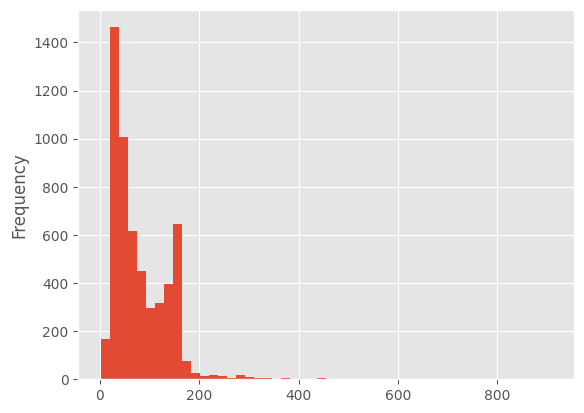

In [9]:
message['length'].plot(bins=50,kind='hist')

In [10]:
message.length.describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
from nltk.corpus import stopwords
import string

In [ ]:
[punc for punc in string.punctuation]

In [16]:
def text_process(msg):
  nonpunc = [char for char in msg if char not in string.punctuation]
  nonpunc=''.join(nonpunc)
  return ' '.join([word for word in nonpunc.split() if word.lower() not in stopwords.words('english')])

In [17]:
message.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
pd.set_option('display.max_colwidth', -1)

<ipython-input-18-0891b765a168>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [19]:
message['tokenized_message'] = message['message'].apply(text_process)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
vectorizer = TfidfVectorizer()

In [22]:
x = vectorizer.fit_transform(message['tokenized_message'])

In [24]:
x.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
print(vectorizer.get_feature_names_out())

january


In [30]:
#Training a Model
from sklearn.model_selection import train_test_split
msg_train , msg_test , label_train , label_test = train_test_split(message['tokenized_message'],message['label'],test_size=0.2)

In [31]:
msg_train.head()

1513    Hows champ leaving glasgow                                                        
4471    3 received mobile content Enjoy                                                   
4914    took hooch walk toaday fell Splat Grazed knees everything stayed home See tomorrow
2040    always make things bigger                                                         
48      Yeah hopefully tyler cant could maybe ask around bit                              
Name: tokenized_message, dtype: object

In [42]:
train_vectorized = vectorizer.transform(msg_train)
test_vectorized = vectorizer.transform(msg_test)

In [43]:
train_array= train_vectorized.toarray()
test_array = test_vectorized.toarray()

In [44]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB().fit(train_array,label_train)

In [47]:
train_preds = classifier.predict(train_array)
test_preds = classifier.predict(test_array)

In [48]:
from sklearn.metrics import classification_report,confusion_matrix

In [49]:
print(confusion_matrix(label_train,train_preds))
print(confusion_matrix(label_test,test_preds))

[[3249  605]
 [   0  603]]
[[872  99]
 [ 15 129]]


In [50]:
# Print the classification report for train and test
print(classification_report(label_train,train_preds))
print("\n")
print(classification_report(label_test,test_preds))

              precision    recall  f1-score   support

         ham       1.00      0.84      0.91      3854
        spam       0.50      1.00      0.67       603

    accuracy                           0.86      4457
   macro avg       0.75      0.92      0.79      4457
weighted avg       0.93      0.86      0.88      4457



              precision    recall  f1-score   support

         ham       0.98      0.90      0.94       971
        spam       0.57      0.90      0.69       144

    accuracy                           0.90      1115
   macro avg       0.77      0.90      0.82      1115
weighted avg       0.93      0.90      0.91      1115

